In [91]:
IRdisplay::display_html("
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
body.rise-enabled div.inner_cell>div.input_area {
    font-size: 150%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 150%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>
")

In [92]:
library(tidyverse)
library(lubridate)
library(forcats)

### Question
How to filter out NA?

In [107]:
w <- words %>% str_extract(".*ss$") %>% 
    fct_count  %>% print

# A tibble: 17 x 2
   f            n
   <fct>    <int>
 1 across       1
 2 address      1
 3 business     1
 4 class        1
 5 cross        1
 6 discuss      1
 7 dress        1
 8 express      1
 9 glass        1
10 guess        1
11 less         1
12 miss         1
13 pass         1
14 press        1
15 process      1
16 unless       1
17 <NA>       964


In [145]:
w <- words %>% str_extract(".*ss$") %>% 
    fct_count %>% mutate(f2 = fct_explicit_na(f)) %>% 
    filter(f2 != "(Missing)") %>% print

# Lecture 15: More on factors & dates

To add an amount of time to something, we can use functions like `days()`, `weeks()`, etc:

In [114]:
today()
today() + days(1)
now() + hours(2)

[1] "2019-03-20"

[1] "2019-03-21"

[1] "2019-03-20 12:11:24 EDT"

There is a difference between these functions and the `ddays()/dyears()` functions we learned in the last lecture. The difference is the following:

In [166]:
mdy("Feb. 28, 2020") + years(1)
mdy("Feb. 28, 2020") + dyears(1)

[1] "2021-02-28"

[1] "2021-02-27"

Why are these different? Which is correct?

### Exercise
Jack is 20,000 days old today. What is Jack's birthday?

In [117]:
today() - days(20000)

[1] "1964-06-16"

#### Example
Earlier in the semester we saw how some flights seem to have arrived before they departed:

In [120]:
filter(flights, arr_time < dep_time) %>% head %>% print

# A tibble: 6 x 19
   year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
  <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
1  2013     1     1     1929           1920         9        3              7
2  2013     1     1     1939           1840        59       29           2151
3  2013     1     1     2058           2100        -2        8           2359
4  2013     1     1     2102           2108        -6      146            158
5  2013     1     1     2108           2057        11       25             39
6  2013     1     1     2120           2130       -10       16             18
# ... with 11 more variables: arr_delay <dbl>, carrier <chr>, flight <int>,
#   tailnum <chr>, origin <chr>, dest <chr>, air_time <dbl>, distance <dbl>,
#   hour <dbl>, minute <dbl>, time_hour <dttm>


This is because these are overnight flights. To fix this, we can now simply add one day to `arr_time`:

In [126]:
flights_dt = flights_dt %>% 
  mutate(
    overnight = arr_time < dep_time,
    arr_time = arr_time + days(overnight * 1),
    sched_arr_time = sched_arr_time + days(overnight * 1)
  ) %>% print

# A tibble: 328,063 x 10
   origin dest  dep_delay arr_delay dep_time            sched_dep_time     
   <chr>  <chr>     <dbl>     <dbl> <dttm>              <dttm>             
 1 EWR    IAH           2        11 2013-01-01 05:17:00 2013-01-01 05:15:00
 2 LGA    IAH           4        20 2013-01-01 05:33:00 2013-01-01 05:29:00
 3 JFK    MIA           2        33 2013-01-01 05:42:00 2013-01-01 05:40:00
 4 JFK    BQN          -1       -18 2013-01-01 05:44:00 2013-01-01 05:45:00
 5 LGA    ATL          -6       -25 2013-01-01 05:54:00 2013-01-01 06:00:00
 6 EWR    ORD          -4        12 2013-01-01 05:54:00 2013-01-01 05:58:00
 7 EWR    FLL          -5        19 2013-01-01 05:55:00 2013-01-01 06:00:00
 8 LGA    IAD          -3       -14 2013-01-01 05:57:00 2013-01-01 06:00:00
 9 JFK    MCO          -3        -8 2013-01-01 05:57:00 2013-01-01 06:00:00
10 LGA    ORD          -2         8 2013-01-01 05:58:00 2013-01-01 06:00:00
# ... with 328,053 more rows, and 4 more variables: arr_time <d

### Time zones
When we create a date-time, the default time zone is "UTC":

In [121]:
ymd_hm("2000-01-30 00:00")

[1] "2000-01-30 UTC"

This is a standard time zone which is, for historical reasons, equal to time in Greenwich, England.

If your times are coming from a different time zone you must specify using the `tz=` option:

In [124]:
ymd_hms("2017-12-30 20:11:59", tz="America/Detroit")
ymd_hms("2017-6-30 20:11:59", tz="America/Los_Angeles")

[1] "2017-12-30 20:11:59 EST"

[1] "2017-06-30 20:11:59 PDT"

You can find your local time zone using:

In [128]:
Sys.timezone()

[1] "America/Detroit"

The command `OlsonNames()` will list all the possible time zones:

In [130]:
OlsonNames()

  [1] "Africa/Abidjan"                   "Africa/Accra"                    
  [3] "Africa/Addis_Ababa"               "Africa/Algiers"                  
  [5] "Africa/Asmara"                    "Africa/Asmera"                   
  [7] "Africa/Bamako"                    "Africa/Bangui"                   
  [9] "Africa/Banjul"                    "Africa/Bissau"                   
 [11] "Africa/Blantyre"                  "Africa/Brazzaville"              
 [13] "Africa/Bujumbura"                 "Africa/Cairo"                    
 [15] "Africa/Casablanca"                "Africa/Ceuta"                    
 [17] "Africa/Conakry"                   "Africa/Dakar"                    
 [19] "Africa/Dar_es_Salaam"             "Africa/Djibouti"                 
 [21] "Africa/Douala"                    "Africa/El_Aaiun"                 
 [23] "Africa/Freetown"                  "Africa/Gaborone"                 
 [25] "Africa/Harare"                    "Africa/Johannesburg"             
 [27] "Afric

## Trump Twitter data
We will now use what we have learned in the past two classes to analyze some real data. 

In [2]:
load("tt.RData")  # see tt/load_tweets.ipynb for code that produces this data.

`trump_tweets` is a dataset of all 37,169 Tweets that Donald Trump has sent since 2010.

In [3]:
# print(trump_tweets)
trump_tweets$created_at[1]

[1] "Thu Dec 30 21:42:01 +0000 2010"

### Task #1
Each tweet has a timestamp in the `created_at` column. We want to convert this column to a proper date-time object so that we can analyze the time component of these tweets.

In [7]:
trump_tweets2 <- trump_tweets %>% mutate(
    dt=str_replace(created_at,
    "\\w+ (\\w+ \\d+) ([\\d:]+) \\+0000 (\\d{4})",
    "\\1 \\3 \\2") %>% mdy_hms) %>% print

# A tibble: 37,169 x 9
   source id_str text  created_at retweet_count in_reply_to_use… favorite_count
   <chr>  <chr>  <chr> <chr>              <int> <chr>                     <int>
 1 Twitt… 20595… WIsh… Thu Dec 3…           144 <NA>                         42
 2 Twitt… 17979… Wish… Thu Dec 2…           109 <NA>                         55
 3 Twitt… 15413… Don'… Thu Dec 1…           112 <NA>                         20
 4 Twitt… 14785… I'll… Tue Dec 1…           250 <NA>                         37
 5 Twitt… 14359… ...T… Mon Dec 1…            12 <NA>                          6
 6 Twitt… 14358… Thos… Mon Dec 1…            14 <NA>                          6
 7 Twitt… 14356… "All… Mon Dec 1…            24 <NA>                          8
 8 Twitt… 13242… Cong… Fri Dec 1…            44 <NA>                         12
 9 Twitt… 12960… Toni… Thu Dec 0…            55 <NA>                          7
10 Twitt… 10355… Toni… Thu Dec 0…            24 <NA>                          3
# ... with 37,159

### Task #2
Plot the number of Tweets that Donald Trump has made for each quarter of the year from 2010 to present.
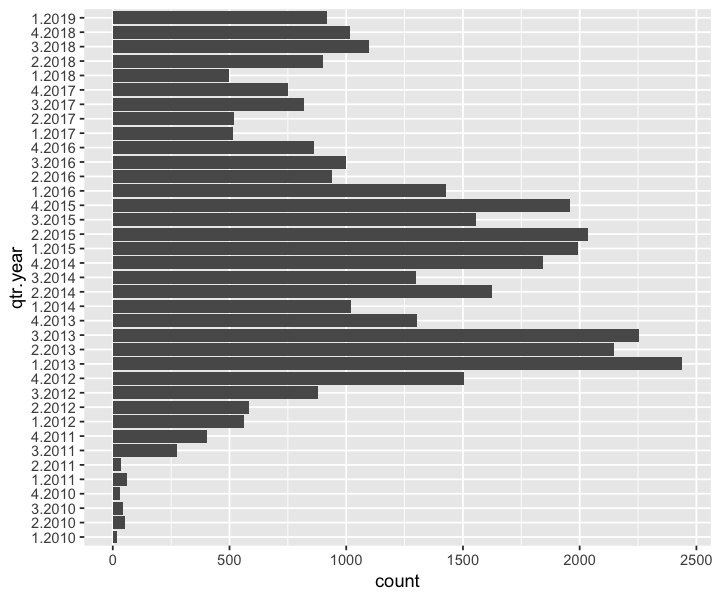

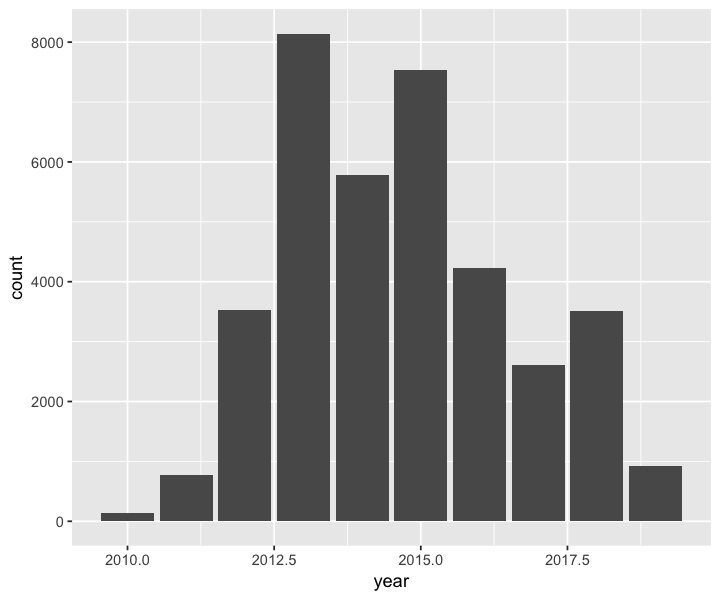

In [152]:
trump_tweets2 %>% mutate(
    year = year(dt),
    ) %>% 
select(dt, year) %>% ggplot + geom_bar(aes(x=year))

### Task #3
Recall that `words` contains common English words. After filtering out these words, and all words that were shorter than six characters, the most common words that the President used in 2018 were:

```
# A tibble: 11 x 2
   words               n
   <chr>           <int>
 1 american          161
 2 border            269
 3 collusion         133
 4 democrats         291
 5 military          183
 6 president         356
 7 realdonaldtrump   182
 8 russia            133
 9 security          151
10 states            150
11 united            150

```

What about for 2012?

In [184]:
common_words <- tibble(word=words)
trump_tweets2 %>% 
    mutate(year=year(dt)) %>% filter(year == 2018)  %>% 
    mutate(word = 
           str_extract_all(str_to_lower(text), "\\b[\\w']+\\b")) %>%
    unnest %>% ungroup %>% anti_join(common_words) %>% 
    count(word) %>% 
    filter(str_length(word) > 5) %>% 
    top_n(10) %>% arrange(-n)

Joining, by = "word"
Selecting by n


   word            n  
1  president       355
2  democrats       291
3  border          269
4  military        183
5  realdonaldtrump 181
6  american        161
7  security        151
8  states          150
9  united          150
10 collusion       133
11 russia          133

### Task #4
What were the president's favorite #hashtags in 2018? 2012?

In [ ]:
# Your code here

### Task #5
At what hour of the day (or night) is the Donald Trump most likely to tweet, and how has this changed over time?

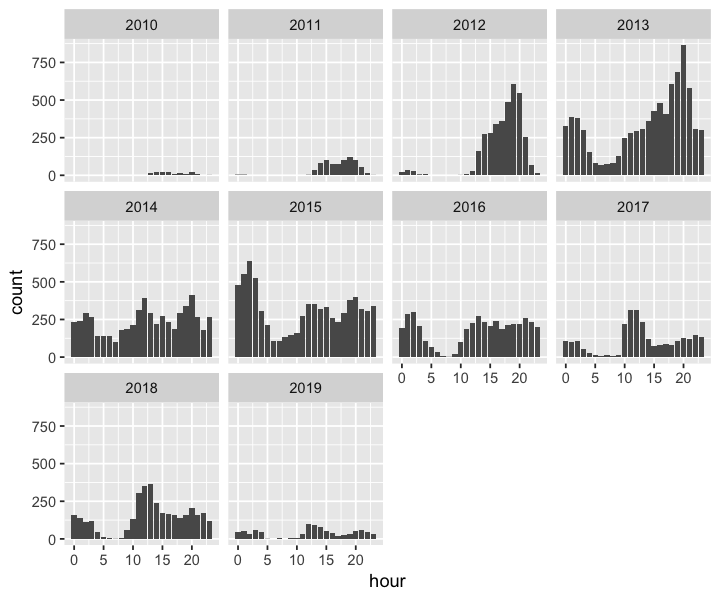

In [211]:
trump_tweets2 %>% mutate(year = year(dt), hour = hour(dt)) %>% 
    ggplot + geom_bar(aes(x=hour)) + facet_wrap(~ year)

### Task #6
"Sentiment analysis" refers to the act of assigning a label such as "positive" or "negative" to a piece of text. We will perform a simple type of sentiment analysis by assigning a numerical score to certain words in each tweet, using the `sentiments` table:

In [186]:
sentiments %>% top_n(5, score)

  word         score
1 breathtaking 5    
2 hurrah       5    
3 outstanding  5    
4 superb       5    
5 thrilled     5    

An example of how this works:

In [8]:
trump_sentiments <- trump_tweets2 %>% 
    mutate(
        month = month(dt),
        year = year(dt),
        word = str_extract_all(str_to_lower(text), "\\b\\w+\\b")) %>% 
    unnest %>% inner_join(sentiments) %>% group_by(year, month, id_str, text) %>% 
    summarize(s=sum(score)) %>% ungroup  

Joining, by = "word"


Average the sentiment by month for the full data set, and make a plot of the monthly average from 2014 to 2018. 

President Trump declared his candidacy in June of 2015. Notice anything?

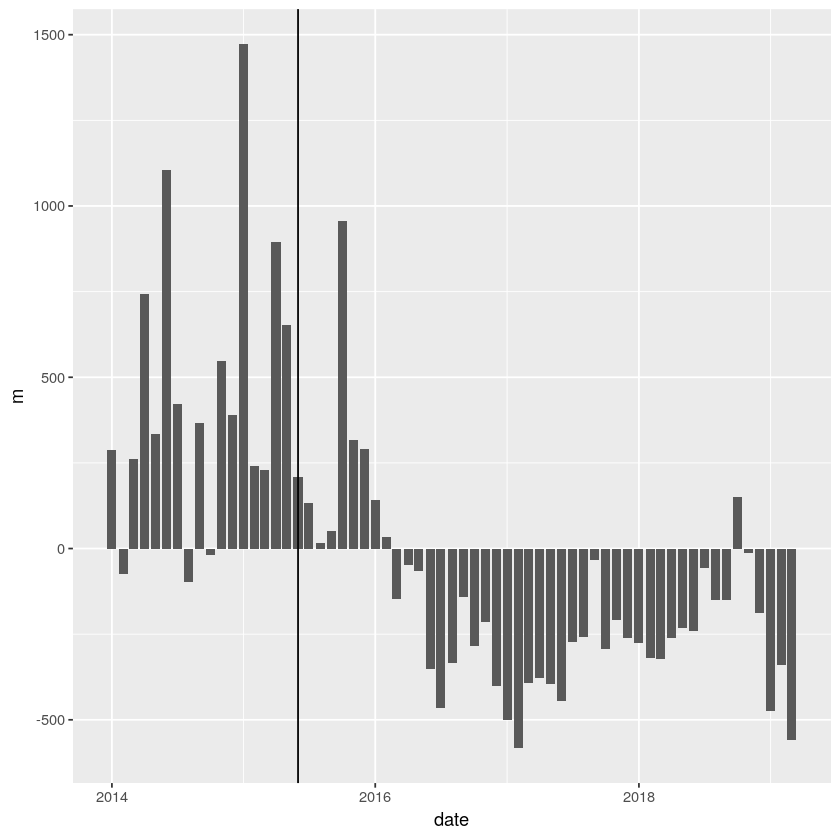

In [13]:
trump_sentiments %>% mutate(
        date=make_date(year, month, 1)
) %>% filter(year >= 2014) %>% group_by(date) %>% 
    summarize(m = sum(s)) %>% mutate(m = m - mean(m))  %>% 
    ggplot + geom_col(aes(x = date, y = m)) + geom_vline(xintercept = mdy("June 1, 2015"))